In [157]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
print(torch.__version__)
print(torchvision.__version__)

2.3.0.post100
0.15.2a0


In [9]:
x = torch.tensor(2.0, requires_grad=True)

In [21]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [23]:
y.backward()

In [25]:
print(x.grad)  #slope of the polynomial at the point 2,63

tensor(93.)


In [27]:
x = torch.tensor([[1.,2,3],[3,2,1]], requires_grad=True)
print(x)

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)


In [31]:
y = 3*x + 2
print(y) #first tensor layer

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)


In [37]:
z = 2*y**2
print(z)    #second layer

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)


In [39]:
out = z.mean()
print(out)

tensor(140., grad_fn=<MeanBackward0>)


In [41]:
out.backward()
print(x.grad)

tensor([[10., 16., 22.],
        [22., 16., 10.]])


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
#over all goal minimize the error between model and data using loss function mean-squared-error
X = torch.linspace(1,50,50).reshape(-1,1)  #create tensor but without gradient

In [51]:
torch.manual_seed(71) # to obtain reproducible results
e = torch.randint(-8,9,(50,1),dtype=torch.float)
print(e.sum())

tensor(0.)


In [53]:
y = 2*X + 1 + e
print(y.shape)  

torch.Size([50, 1])


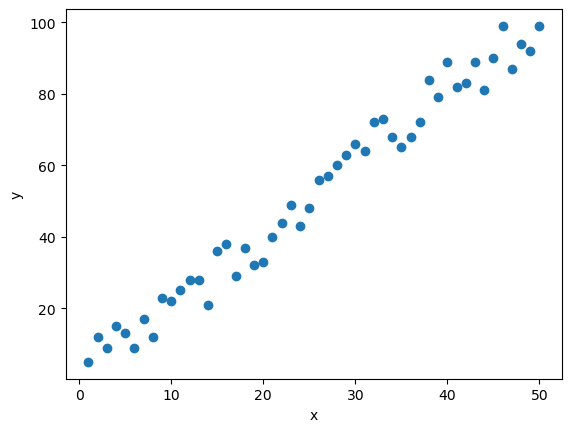

In [55]:
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x');

In [ ]:
#X doesn't have gradient so can't get backwards y fxn, use nn.Linear() to predict relationship instead 

In [181]:
torch.manual_seed(123)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4078]], requires_grad=True)
Parameter containing:
tensor([0.0331], requires_grad=True)


In [183]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features) #doesn't refer to linear regression, its nn related
    def forward(self, x):   #method defines how the data flows through the model
        y_pred = self.linear(x)
        return y_pred

In [185]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)  # Define the linear layer

    def forward(self, x):
        y_pred = self.linear(x)  # Define the forward pass
        return y_pred

In [187]:
torch.manual_seed(123)
model = Model(1, 1)  #1 input feature, 1 output feature 
print(model)
print('Weight:', model.linear.weight.item())
print('Bias:  ', model.linear.bias.item())

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight: -0.4077761173248291
Bias:   0.033124566078186035


In [189]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 -0.4077761173248291
linear.bias 	 0.033124566078186035


In [191]:
#pass tensor into the model 

In [193]:
x = torch.tensor([2.0])
print(model.forward(x))   # equivalent to print(model(x))

tensor([-0.7824], grad_fn=<ViewBackward0>)


In [195]:
#plot initial model 

In [197]:
x1 = np.array([X.min(),X.max()])
print(x1)

[ 1. 50.]


In [199]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Initial weight: {w1:.8f}, Initial bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(y1)

Initial weight: -0.40777612, Initial bias: 0.03312457

[ -0.37465155 -20.35568   ]


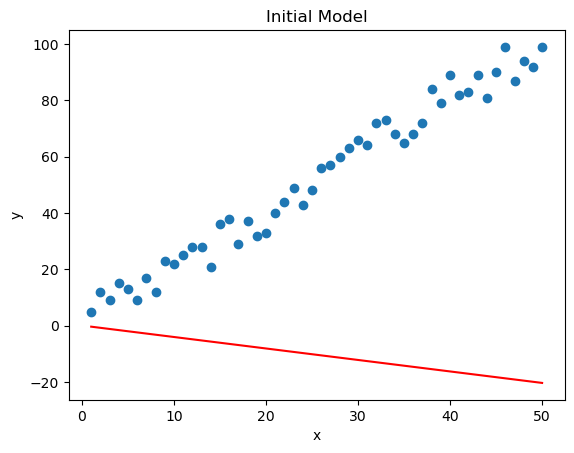

In [201]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Initial Model')
plt.ylabel('y')
plt.xlabel('x');

In [203]:
criterion = nn.MSELoss()

In [205]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) # stochastic gradient descent with
#applied learning rate (lr) of 0.001

In [207]:
epochs = 50 #num passes through the dataset
losses = []  #create data frame to store loss values

for i in range(epochs):  #iterate through epochs
    i+=1
    y_pred = model.forward(X)   #prediction set
    loss = criterion(y_pred, y)  #loss calculation
    losses.append(loss.item()) #keep track of losses
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}  weight: {model.linear.weight.item():10.8f}  \
bias: {model.linear.bias.item():10.8f}') 
    optimizer.zero_grad()   #reset the gradient through each epoch
    loss.backward()    #backpropagation 
    optimizer.step()   #model hyperparameters

epoch:  1  loss: 5057.90136719  weight: -0.40777612  bias: 0.03312457
epoch:  2  loss: 2621.83251953  weight: 3.75072598  bias: 0.15785491
epoch:  3  loss: 1364.17724609  weight: 0.76271904  bias: 0.07025218
epoch:  4  loss: 714.89428711  weight: 2.90958762  bias: 0.13521300
epoch:  5  loss: 379.69201660  weight: 1.36696982  bias: 0.09055360
epoch:  6  loss: 206.63841248  weight: 2.47530437  bias: 0.12465703
epoch:  7  loss: 117.29640961  weight: 1.67888927  bias: 0.10216720
epoch:  8  loss: 71.17169189  weight: 2.25106597  bias: 0.12033951
epoch:  9  loss: 47.35845566  weight: 1.83988845  bias: 0.10929446
epoch: 10  loss: 35.06388855  weight: 2.13526607  bias: 0.11924156
epoch: 11  loss: 28.71597481  weight: 1.92297292  bias: 0.11410451
epoch: 12  loss: 25.43810081  weight: 2.07544899  bias: 0.11980468
epoch: 13  loss: 23.74520493  weight: 1.96583307  bias: 0.11771718
epoch: 14  loss: 22.87056160  weight: 2.04453421  bias: 0.12122425
epoch: 15  loss: 22.41835022  weight: 1.98792660  b

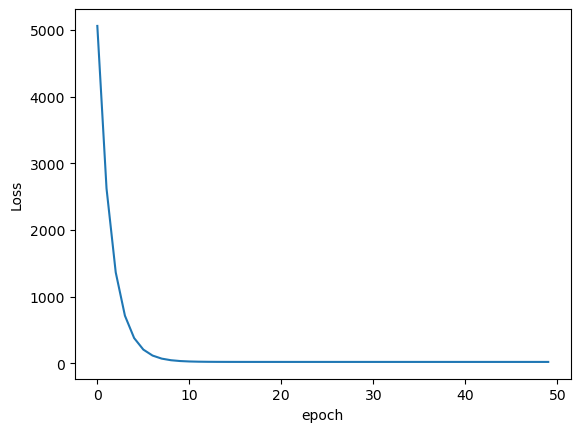

In [209]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [211]:
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
print(f'Current weight: {w1:.8f}, Current bias: {b1:.8f}')
print()

y1 = x1*w1 + b1
print(x1)
print(y1)

Current weight: 2.01034236, Current bias: 0.16305667

[ 1. 50.]
[  2.173399 100.680176]


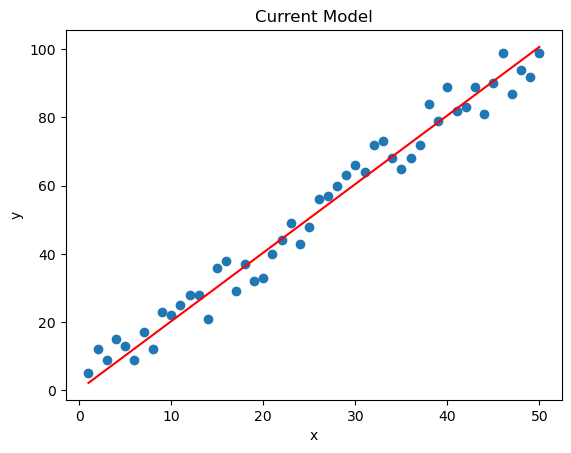

In [213]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1,y1,'r')
plt.title('Current Model')
plt.ylabel('y')
plt.xlabel('x');

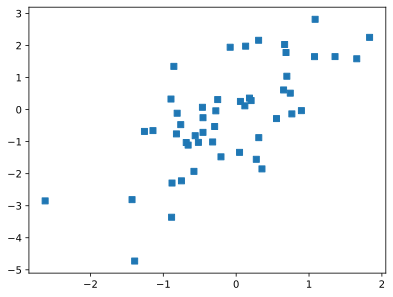

In [15]:
#another dataset
N = 50
x = torch.randn(N,1)
noise=0.9  #0.1-5 with 5 being low noise 
y = x + torch.randn(N,1)/noise  #with a "noise" level

# and plot
plt.plot(x,y,'s')
plt.show()

In [17]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
print(torch.__version__)
print(torchvision.__version__)

2.3.0.post100
0.15.2a0


In [19]:
#linear regression model 
ANNregression = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
ANNregression

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [21]:
# learning rate
learningRate = .05

# loss function:MSE for continuous data with a numerical prediction
lossfun = nn.MSELoss()

# optimizer, stochastic gradient descent 
optimizer = torch.optim.SGD(ANNregression.parameters(),lr=learningRate)

#then perform the forward pass, compute the loss, backpropagate the gradients, 
#and update the model parameters using the optimizer in each epoch.

In [23]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)

## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNregression(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

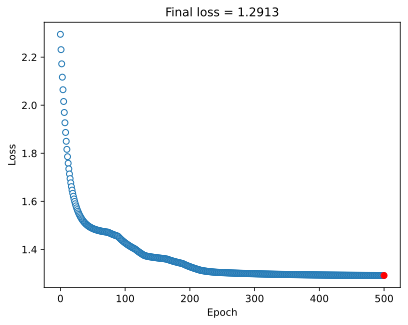

In [25]:
# manually compute losses
# final forward pass
predictions = ANNregression(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [ ]:
testloss.item()

In [ ]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

In [27]:
#training function that outputs final predictions and losses 
def linmodel(x,y): 
    ANNregression = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
    # learning rate
    learningRate = .05
    numepochs = 500
    # loss function:MSE for continuous data with a numerical prediction
    lossfun = nn.MSELoss()
    
    # optimizer, stochastic gradient descent 
    optimizer = torch.optim.SGD(ANNregression.parameters(),lr=learningRate)
    losses = torch.zeros(numepochs)
    
    for epochs in range(numepochs):

          # forward pass
          yHat = ANNregression(x)
        
          # compute loss
          loss = lossfun(yHat,y)
          losses[epochs] = loss;
        
          # backprop
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
    ypred = ANNregression(x)

# final loss (MSE)
    testloss = (ypred-y).pow(2).mean();
    
    plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)  #detach creates copy without gradient 
    plt.plot(numepochs,testloss.detach(),'ro')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Final loss = %g' %testloss.item())
    plt.show()
    
    return ypred,lossfun

In [29]:
#function to generate model data
def modeldata(npoints,noise):
    x=torch.randn(npoints,1);
    y=x + torch.randn(npoints,1)/noise;
    plt.plot(x,y,'s')
    plt.show()
    return x,y;

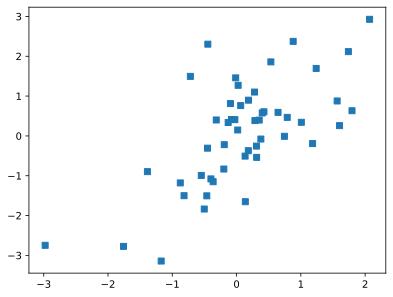

In [31]:
npoints,noise= modeldata(50,1)

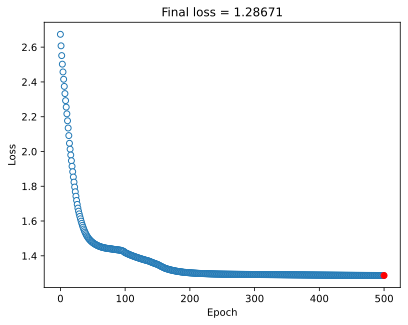

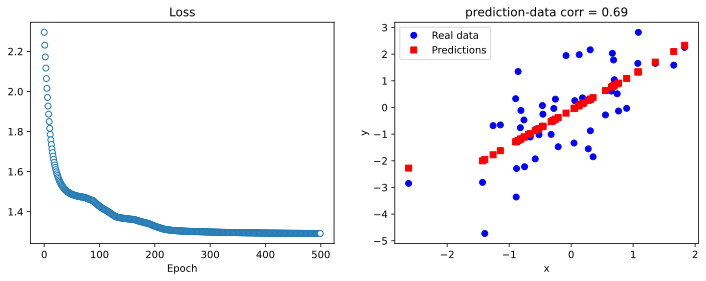

In [37]:
ypred,lossfun= linmodel(x,y)
yhat = ypred.detach()
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yhat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
#Computes corr coeff between y and yhat, t transposes y and yhat  
#bc np.corrcoef expects rows as variables and columns as observations
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yhat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()